# ADS take home challenge

In [1]:
#import libraries for data exploration and manipulation
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import numpy as np

from helper import *

%matplotlib inline

## Data exploration and manipulating
Let's explore the data and look at what kind of information we have, check for missing values and standarize the information.

In [2]:
df = pd.read_csv("data/MN_geochem_ads.csv")
df.head()

,sample,medium,easting_wgs84,northing_wgs84,date_assay,company,structure,lithology,Co_ppm,Cu_ppm,Ni_ppm
0,9175100,rock,-93.16750,48.60222,11/14/00,united_states_geological_survey,NaN,metasediment,21.0,36.0,75
1,9175101,rock,-93.16750,48.60222,11/14/00,united_states_geological_survey,NaN,NaN,29.0,198.0,44
2,9175102,rock,-93.11861,48.60639,11/14/00,united_states_geological_survey,NaN,NaN,11.0,91.0,18
3,9175103,rock,-93.11861,48.60639,11/14/00,united_states_geological_survey,NaN,NaN,17.0,63.0,32
4,9175104,rock_outcrop,92.70556,-48.51444,11/14/00,united_states_geological_survey,NaN,metasediment,18.0,28.0,77


In [3]:
#data info/summary
print(df.info())
print('\n\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample          305 non-null    int64  
 1   medium          305 non-null    object 
 2   easting_wgs84   305 non-null    float64
 3   northing_wgs84  304 non-null    float64
 4   date_assay      305 non-null    object 
 5   company         305 non-null    object 
 6   structure       110 non-null    object 
 7   lithology       289 non-null    object 
 8   Co_ppm          302 non-null    float64
 9   Cu_ppm          242 non-null    float64
 10  Ni_ppm          305 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 26.3+ KB
None


              sample  easting_wgs84  northing_wgs84      Co_ppm        Cu_ppm
count  3.050000e+02     305.000000      304.000000  302.000000    242.000000
mean   9.375963e+06     -87.463830       44.920253   46.256391    117.286674
std    1

In [4]:
print_unique(df)


sample
 [9175100 9175101 9175102 9175103 9175104 9175105 9175106 9175107 9177294
 9177295 9177296 9177297 9177298 9177299 9177300 9177301 9177302 9177303
 9177304 9177305 9177306 9177307 9177308 9177309 9177310 9262285 9262286
 9262287 9262288 9262290 9262291 9262292 9262293 9262294 9262295 9262296
 9262308 9262309 9262310 9262311 9262312 9278638 9278639 9278640 9278641
 9278645 9278646 9278647 9278648 9278649 9278652 9278653 9278654 9278655
 9278656 9278657 9278658 9278659 9278660 9278661 9278662 9278663 9278664
 9278665 9278666 9278667 9278668 9278669 9278670 9278671 9278672 9278673
 9278674 9278675 9278676 9278677 9278678 9278679 9278680 9278681 9278682
 9278683 9278684 9278685 9278686 9278687 9278688 9278689 9278690 9278691
 9332266 9332267 9332268 9332269 9332270 9332271 9332272 9332273 9332274
 9332275 9332276 9332277 9332278 9332285 9332286 9332288 9332289 9332290
 9332291 9332901 9333148 9333348 9333349 9333351 9333355 9333361 9334243
 9334244 9334245 9334247 9334248 9334249 9

Notes:
* Some columns have null values. From those, the most relevant are 'Co_ppm' and 'northing_wgs84'
* Some litology variables have the same value but different spelling or casing.
* Ni_ppm should be a float. There are a couple odd values (<1.5, -1.25) but we only care about high density so they'd be filtered out anyway.
* We dont care if structure is null, and we'd lose about a third of the data if we removed those entries.

**Clean data and standardize**

In [5]:
df = remove_empties(df,'structure')

gabbro_list = ['GABBRO','gabro']
basalt_list = ['basaltt', 'bassalt', 'basalt', 'basalt.', 'Basalt']
fix_column(df,'lithology','gabbro',gabbro_list)    
fix_column(df,'lithology','basalt',basalt_list)    

#replace special char value to be able to convert to float
df['Ni_ppm'].mask(df['Ni_ppm'] == '<1.5', 1.5, inplace=True)
# negative values dont make sense
df['Ni_ppm'].mask(df['Ni_ppm'] == '-1.25', 0.0, inplace=True)
df['Ni_ppm'] = df['Ni_ppm'].astype(float)

print_unique(df)

print(df.info())


sample
 [9175100 9175104 9175105 9175107 9177294 9177295 9177296 9177297 9177298
 9177299 9177300 9177301 9177302 9177303 9177304 9177305 9177306 9177307
 9177308 9177309 9177310 9262285 9262286 9262287 9262288 9262290 9262291
 9262292 9262294 9262308 9262310 9262311 9262312 9278639 9278640 9278641
 9278645 9278647 9278648 9278649 9278652 9278653 9278655 9278659 9278660
 9278661 9278662 9278663 9278664 9278665 9278666 9278667 9278668 9278669
 9278670 9278671 9278672 9278673 9278674 9278675 9278676 9278677 9278678
 9278679 9278680 9278681 9278682 9278683 9278684 9278685 9278686 9278687
 9278688 9278689 9278690 9278691 9332266 9332267 9332268 9332269 9332270
 9332271 9332272 9332273 9332274 9332275 9332276 9332277 9332278 9332285
 9332286 9332288 9332289 9332290 9332291 9332901 9333148 9333348 9333349
 9333351 9333355 9333361 9334243 9334244 9334245 9334247 9334248 9334249
 9334250 9334251 9334252 9334255 9334256 9334259 9334260 9334261 9334262
 9334263 9334264 9334265 9334266 9334314 9

Data has been cleaned and typos have been fixed. Save the dataframe in a csv file.

In [6]:
df.to_csv('data/MN_geochem_ads_clean.csv')

## Visualization

We are looking for high concentration deposits of Nickel and Cobalt in gabbro and basalt lithologies. Lets look at the density distributions of these.

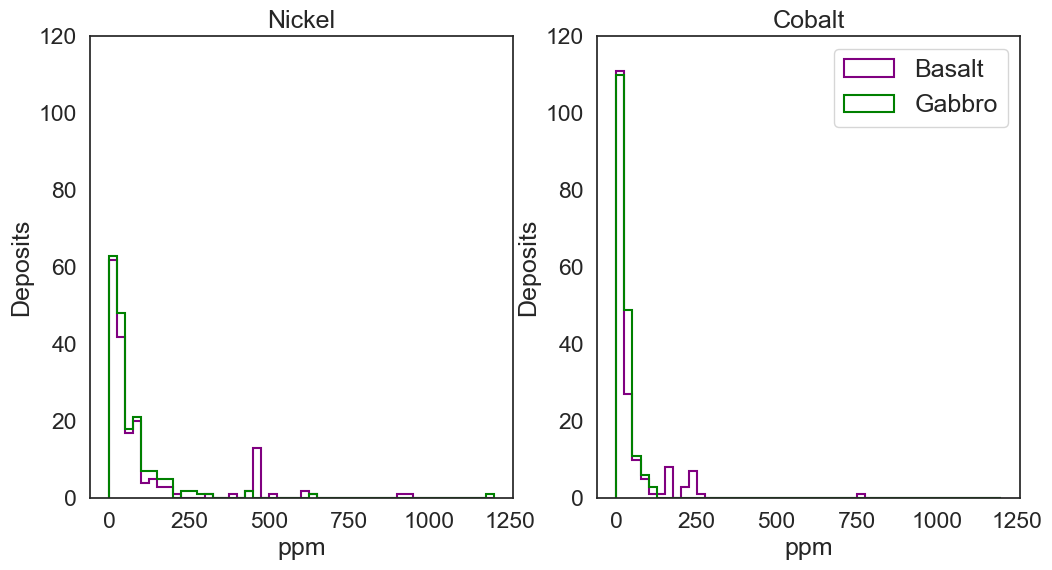

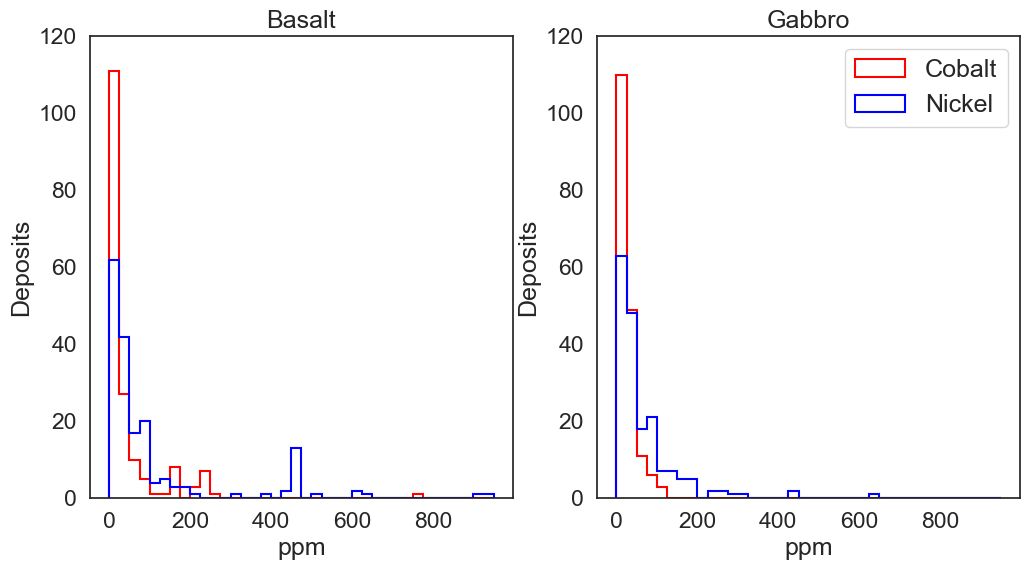

In [25]:
basalt_mask = df['lithology']=='basalt'
gabbro_mask = df['lithology']=='gabbro'

#aestetics
color_basalt = 'purple'
color_gabbro = 'green'
color_ni = 'blue'
color_co = 'red'
line_width = 1.5
hist_type = 'step'

df1_1 = df['Ni_ppm'].mask(basalt_mask)
df1_2 = df['Ni_ppm'].mask(gabbro_mask)
df2_1 = df['Co_ppm'].mask(basalt_mask)
df2_2 = df['Co_ppm'].mask(gabbro_mask)
plot_geo(df1_1, df1_2, df2_1, df2_2, max(df1_1), max(df1_2),
             color_basalt, color_gabbro, 'Basalt', 'Gabbro', 'Nickel', 'Cobalt', 'ppm_by_metal')

df1_1 = df['Co_ppm'].mask(basalt_mask)
df1_2 = df['Ni_ppm'].mask(basalt_mask)
df2_1 = df['Co_ppm'].mask(gabbro_mask)
df2_2 = df['Ni_ppm'].mask(gabbro_mask)
plot_geo(df1_1, df1_2, df2_1, df2_2, max(df1_1), max(df1_2),
             color_co, color_ni, 'Cobalt', 'Nickel', 'Basalt', 'Gabbro', 'ppm_by_lithology')

**Quick analysis**

Visualy analysing the distributions, basalt lithologies seem to contain larger concentrations of both cobalt and nickel than gabbro.

A quantitatively way to conclude what lithology is more promising is by counting the number of deposits/sites that larger than a certain ppm value. Say we consider ppm>100 as high concentration, then 

In [32]:
basalt_mask = df['lithology']=='basalt'
gabbro_mask = df['lithology']=='gabbro'

print("Nickel deposits with ppm > 100", df[df['Ni_ppm'] > 100].count())
print("Cobalt deposits with ppm > 100", df[df['Co_ppm'] > 100].count())

print('\n\nNumber of sites')
for cut in [50, 75, 100, 125]:
    for lit in ['gabbro', 'basalt']:
        nickel_mask = (df.Ni_ppm > cut) & (df.lithology==lit)
        cobalt_mask = (df.Co_ppm > cut) & (df.lithology==lit)
        print('Nickel >', cut, ' ppm in ', lit, '=', nickel_mask.sum())
        print('Cobalt >', cut, ' ppm in ', lit, '=', cobalt_mask.sum(),'\n')

Nickel deposits with ppm > 100 sample            59
medium            59
easting_wgs84     59
northing_wgs84    59
date_assay        59
company           59
structure         28
lithology         59
Co_ppm            59
Cu_ppm            59
Ni_ppm            59
geometry          59
dtype: int64
Cobalt deposits with ppm > 100 sample            25
medium            25
easting_wgs84     25
northing_wgs84    25
date_assay        25
company           25
structure          5
lithology         25
Co_ppm            25
Cu_ppm            25
Ni_ppm            25
geometry          25
dtype: int64


Number of sites
Nickel > 50  ppm in  gabbro = 32
Cobalt > 50  ppm in  gabbro = 34 

Nickel > 50  ppm in  basalt = 29
Cobalt > 50  ppm in  basalt = 16 

Nickel > 75  ppm in  gabbro = 30
Cobalt > 75  ppm in  gabbro = 25 

Nickel > 75  ppm in  basalt = 27
Cobalt > 75  ppm in  basalt = 8 

Nickel > 100  ppm in  gabbro = 28
Cobalt > 100  ppm in  gabbro = 22 

Nickel > 100  ppm in  basalt = 21
Cobalt > 100  p

Counting in the dataframe tells us that the **gabbro sites have higher concentrations of nickel and cobalt**. 
However, another way to determine what kind of sites would be more profitable would be by looking at the ppm average or even the mode for each lithology.

In [34]:
print('\n\nNumber of sites')
for cut in [50, 75, 100, 125]:
    for lit in ['gabbro', 'basalt']:
        
        nickel_temp = df.loc[(df.Ni_ppm>cut) & (df.lithology==lit)]
        cobalt_temp = df.loc[(df.Co_ppm>cut) & (df.lithology==lit)]
        print('Nickel >', cut, ' ppm mean in ', lit, '=', (nickel_temp['Ni_ppm']).mean())
        print('Cobalt >', cut, ' ppm mean in ', lit, '=', (cobalt_temp['Co_ppm']).mean())
        print('Nickel >', cut, ' ppm mode in ', lit, '=', nickel_temp['Ni_ppm'].mode())
        print('Cobalt >', cut, ' ppm mode in ', lit, '=', cobalt_temp['Co_ppm'].mode(),'\n')



Number of sites
Nickel > 50  ppm mean in  gabbro = 366.703125
Cobalt > 50  ppm mean in  gabbro = 164.4264705882353
Nickel > 50  ppm mode in  gabbro = 0    450.0
Name: Ni_ppm, dtype: float64
Cobalt > 50  ppm mode in  gabbro = 0    150.0
Name: Co_ppm, dtype: float64 

Nickel > 50  ppm mean in  basalt = 192.72413793103448
Cobalt > 50  ppm mean in  basalt = 78.8875
Nickel > 50  ppm mode in  basalt = 0    100.0
1    150.0
2    190.0
Name: Ni_ppm, dtype: float64
Cobalt > 50  ppm mode in  basalt = 0    120.0
Name: Co_ppm, dtype: float64 

Nickel > 75  ppm mean in  gabbro = 386.85
Cobalt > 75  ppm mean in  gabbro = 199.62
Nickel > 75  ppm mode in  gabbro = 0    450.0
Name: Ni_ppm, dtype: float64
Cobalt > 75  ppm mode in  gabbro = 0    150.0
Name: Co_ppm, dtype: float64 

Nickel > 75  ppm mean in  basalt = 202.25925925925927
Cobalt > 75  ppm mean in  basalt = 100.25
Nickel > 75  ppm mode in  basalt = 0    100.0
1    150.0
2    190.0
Name: Ni_ppm, dtype: float64
Cobalt > 75  ppm mode in  basal

Looking at the mean and mode supports **gabbro** sites as the most prospective to look for high concentrations of nickel and cobalt.

### Geoframe
Take the existing df and turn it into a geopanda dataframe. The coordinates are given in world geodetic system (wgs84).
The coordinates in the raster are in UTM, therefore we have to convert them to WSG or convert the geodataframe points to UTM.

In [9]:
points = df.apply(lambda row: Point(row.easting_wgs84,row.northing_wgs84), axis=1)
points.head()

/usr/local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0     POINT (-93.1675 48.60222)
4    POINT (92.70556 -48.51444)
5     POINT (-93.00694 48.5425)
7    POINT (-92.66083 48.39556)
8     POINT (-89.82863 48.0046)
dtype: object

In [10]:
geodf = gpd.GeoDataFrame(df, geometry=points)
geodf = geodf.set_crs('epsg:4326') # use epsg 4216 for geodetic lat and lon. ellipsoidal.
geodf = geodf.to_crs(32615) # convert to UTM N15
geodf.head()

,sample,medium,easting_wgs84,northing_wgs84,date_assay,company,structure,lithology,Co_ppm,Cu_ppm,Ni_ppm,geometry
0,9175100,rock,-93.16750,48.60222,11/14/00,united_states_geological_survey,NaN,metasediment,21.0,36.0,75.0,POINT (487651.365 5383251.540)
4,9175104,rock_outcrop,92.70556,-48.51444,11/14/00,united_states_geological_survey,NaN,metasediment,18.0,28.0,77.0,POINT (78724.866 -14606711.494)
5,9175105,rock_outcrop,-93.00694,48.54250,11/14/00,united_states_geological_survey,NaN,metasediment,15.0,21.0,41.0,POINT (499487.758 5376599.729)
7,9175107,rock_outcrop,-92.66083,48.39556,11/14/00,united_states_geological_survey,NaN,metasediment,19.0,47.0,70.0,POINT (525106.526 5360322.162)
8,9177294,rock_outcrop,-89.82863,48.00460,11/6/01,united_states_geological_survey,dike; sill; laccolith,gabbro,54.0,174.0,37.5,POINT (736536.370 5321679.022)


In [11]:
#geodf.plot()

This geodataframe contains all the information independently of the cobalt or nickel ppm. Lets make a smalled dataframe that only contains data of potential exploration places to overlay on the raster.

In [43]:
ppm_min = 125 # set a minimum ppm
geodf_sel = geodf.loc[(geodf.Ni_ppm>ppm_min) & (geodf.Co_ppm>ppm_min)]
geodf_sel_gabbro = geodf.loc[(geodf.Ni_ppm>ppm_min) & (geodf.Co_ppm>ppm_min) & (geodf.lithology=='gabbro')]
geodf_sel_basalt = geodf.loc[(geodf.Ni_ppm>ppm_min) & (geodf.Co_ppm>ppm_min) & (geodf.lithology=='basalt')]
print_selection_coord(geodf_sel,ppm_min,'selected_sites')

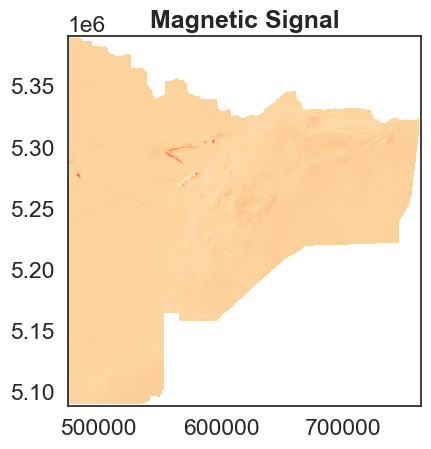

In [13]:
import rioxarray as rxr 
import rasterio.plot

# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

# Prettier plotting with seaborn
import seaborn as sns 
sns.set(font_scale=1.5, style="white")

mn_data = "data/MN_mag.tif"
tiff = rasterio.open(mn_data)

fig, ax = plt.subplots()
simple_raster = rasterio.plot.show(tiff, title = "Magnetic Signal",cmap='OrRd')

/usr/local/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


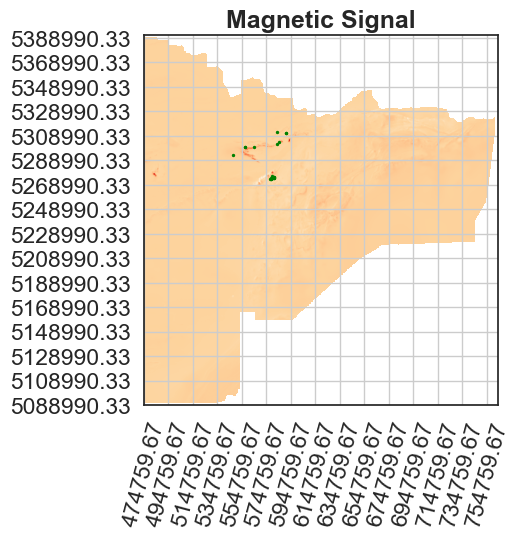

In [44]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

# take rasterio boundaries
extent=[tiff.bounds[0], tiff.bounds[2], tiff.bounds[1], tiff.bounds[3]]
ax = rasterio.plot.show(tiff, ax=ax, extent=extent, title = 'Magnetic Signal', cmap='OrRd')
# Major ticks every 20, minor ticks every 5
ticks_x = np.arange(tiff.bounds[0], tiff.bounds[2], 20000)
ticks_y = np.arange(tiff.bounds[1], tiff.bounds[3], 20000)

ax.set_xticks(ticks_x)
ax.set_yticks(ticks_y)
ax.set_xticklabels(ax.get_xticks(), rotation = 75)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# And a corresponding grid

ax.grid(which='both')

geodf_sel_gabbro.plot(ax=ax, color=color_gabbro, markersize=2)
geodf_sel_basalt.plot(ax=ax, color=color_basalt, markersize=2)

plt.savefig('plots/mn_selsites.png')

There are no sites with Ni_ppm or Co_ppm > 125 in basalt. All the sites represented by the green markers correspond to gabbro sites. Combining the site information with the observations of the magnetic signal, it can be concluded that the most promising sites to explore are within the following boundaries, in UTM N15 coordinates:

* [574760,594760],[526900,5289000]
* [574760,594760],[526900,5309000]
* [554760,574760],[526900,5309000]